# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`. Com relação aos dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', podemos dizer que:
 
 <font color='red'>(a) São do tipo completamente aleatório (MCAR)</font><br>
 (b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>
 
 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 
 <i>TL;DR: Não há justificativa razoável para dizer que a perda da informação Sexo tem relação clara com algum outro *atributo* ou com o próprio *valor da variável*. Considerar MCAR é o mais plausível pois é razoável dizer que os dados existentes (não faltantes) são representativos com relação aos faltantes.
 


 <i>Explicação item a item:
 1. MAR não se aplica pois há poucos dados para afirmar condicionalidade: não seria adequado confiar demais em poucos dados para estabelecer relações com *valores específicos* como "England" do atributo país e o valor "1973" do atributo ano de nascimento.
    * país England: os dados perdidos representam 50% de todos os desse país, mas isso indica realmente algo? Os dois outros perdidos são USA, mas para esse temos muitos outros não faltantes, então há mesmo um padrão ligando País a perda do atributo Sexo? Porque 50% dos faltantes são de England mas para USA isso não se aplicaria?
    * ano 1973: o argumento é parecido, e seria ainda mais difícil considerar uma relação pois precisaríamos condicionar ao ano 1973 e ao país USA, já que para England isso não se aplica (os anos de nascimento são 1986 e 1979 para England).
    
    Assim, para considerar condicionalmente aleatório, não basta achar correlação individual com valores isolados (England, 1973), se isso não tem um embasamento mais forte. Considerar MAR significaria dizer com certeza que a perda está relacionada a valores específicos, e essa conclusão pode estar equivocada.<br>
 
 2. Podemos descartar o caso não aleatório pois não é possível afirmar que a falta dos dados tem a ver com o valor da variável. A distribuicao entre M e F é balanceada na base como um todo, a falta da informação em algumas linhas não tem relação clara com os próprios valores faltantes (M ou F). Apesar desse ser um atributo sensível (Sexo), os dados não indicam de nenhuma forma essa hipótese e, novamente, é razoável dizer que os dados existentes (não faltantes) são representativos com relação aos faltantes.<br>
    
 *Conclusão - não é possível encontrar qualquer relação não aleatória, portanto temos o caso MCAR.*</i>

In [3]:
df[(df['Sex']!= 'F') & (df['Sex']!= 'M')]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0
12,Kraig Kriner,NaN,1972,Scotland,Christian,Edinburgh,Nurse,16.0
38,Archie Hogan,NaN,1976,Wales,Christian,Edinburgh,Nurse,19.0


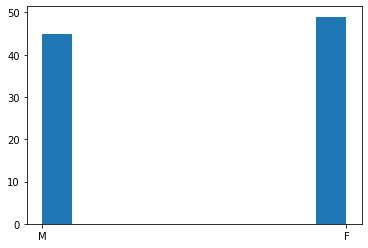

In [4]:
# distribuicao de Sex na base de dados
h = plt.hist(df.loc[df['Sex'].notnull(), 'Sex'])

---

### Questão 2)


Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

 <font color='red'>(a) 9 dados faltantes (sendo desses 5 dados errôneos) e 1 outlier<br></font>
 (b) 4 dados faltantes devido a omissão do usuário<br>
 (c) 9 dados errôneos, sendo desses 2 outliers<br>
 (d) 1 outlier<br>

<font color='red'>Resposta: </font>*os dados fora do esperado são  `--`, `[`, `d`, `Ac%#`, `1` e nan, sendo desses 4 nans. Assim, 9 são faltantes no total, sendo 5 digitados erroneamente ou corrompidos. Além disso, aparece uma única ocorrência do valor 'Buddhist', o que pode ser considerado um outlier*<br>

In [5]:
values = df['Religion'].unique()
print(values, end='\n\n')

# listando os valores únicos e sua quantidade
print("Valor\t\tQuantidade")
# exibindo valores nulos/nan
print("nan\t\t", np.sum(df['Religion'].isnull()))
for value in df['Religion'].unique():
    if (value == value):
        print(value, end='\t\t')
        print(np.sum(df['Religion'] == value))

['Christian' 'd' nan '[' '----' '1' 'Ac%#' 'Buddhist']

Valor		Quantidade
nan		 4
Christian		90
d		1
[		1
----		1
1		1
Ac%#		1
Buddhist		1


In [6]:
valid_religion = ['Christian', 'Buddhist']
invalid_religion = np.delete(values, np.isin(values, valid_religion))
print(invalid_religion)

['d' nan '[' '----' '1' 'Ac%#']


In [7]:
df[df['Religion'].isin(invalid_religion)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
39,Marlon Moore,M,1984,Australia,[,Brisbane,Nurse,4.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
63,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0
67,Marshall Vargas,M,1990,Scotland,1,Edinburgh,Nurse,NaN
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0
92,Norah Carey,F,1961,Scotland,NaN,Edinburgh,Nurse,31.0


---
### Questão 3)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) permitir executar validação dos dados, mas não possibilitar acesso direto<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) armazenado em arquivos de formato texto livre, permitindo controle de versões<br>
<font color='red'>(d) possuir campos e atributos que permitam endereçar os dados diretamenteo<br></font>

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 3 outliers globais<br>
(b) 1 outlier, pois os outros dados são plausíveis<br>
<font color='red'>(c) 3 outliers globais, sendo dois desses também outliers contextuais<br></font>
(d) 3 outliers contextuais, sendo um deles também um outlier global<br>


 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 *Analisando o boxplot, vemos que os outliers estão acima de 35 anos de experiencia. Selecionando-os, notamos que são efetivamente pontos aberrantes, com 45 anos de experiencia ou mais. No entanto, um deles faz sentido pois uma pessoa nascida em 1950, que teria hoje cerca de 70 anos, pode realmente ter 45 anos de experiência, já os demais possuem idade incompatível com a experiência indicada e portanto são também outliers contextuais*

<AxesSubplot:>

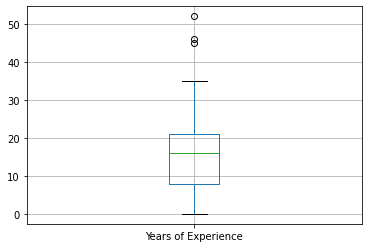

In [8]:
df.boxplot(['Years of Experience'])

In [9]:
df[df['Years of Experience']>35]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1983,Mexico,Christian,Acapulco,Nurse,52.0
8,Lora Lemoine,F,1976,England,Christian,Birmingham,Nurse,46.0
22,Ariel Almada,F,1950,Portugal,Christian,Lisbon,Nurse,45.0


## Questão 5)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

(a) a linha 15 e a linha 71 possuem outliers e dados errôneos, ambas devem ser removidas por completo.<br>
<font color='red'>(b) a linha 15 possui valores considerados outliers, mas são plausíveis e podem ser mantidos; a linha 71 possui outliers e dados errôneos e deve ser removida<br></font>
(c) a linha 22 possui outliers e atributos com dados errôneos, com valores que devem ser removidos; a linha 71 possui um outlier, mas é plausível e pode ser mantido<br>
(d) a linha 15 e a linha 71 possuem valores outliers, mas podem ser mantidos pois não há outros problemas que exigam limpeza<br>

 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 *A linha 15 já foi analisada na questão anterior, possui um valor outlier (1940), mas plausível, já a linha 71 possui ano de nascimento 2010 portanto essa pessoa não poderia ter profissão "Enfermeiro(a)", o que é reforcado pelos 16 Anos de Experiencia, bem como outros atributos com valores fora do esperado. Assim, é mais seguro remover essa linha como dados inputados incorretamente ou corrompidos.*

<AxesSubplot:>

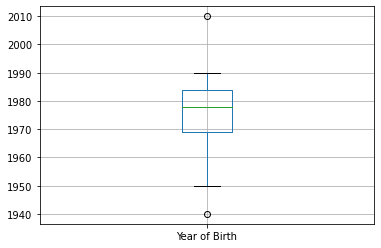

In [10]:
df.boxplot(['Year of Birth'])

In [11]:
df[(df['Year of Birth']>1990) | (df['Year of Birth']<1950)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
15,Vinicius Vitorio,M,1940,Brazil,Christian,São Paulo,Nurse,35.0
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0
